In [30]:
# Problem 1: Relationship between Volume and Pressure in a closed system
# Task A: Data Import and Exploration

import pandas as pd                                # Imports Pandas package

df = pd.read_csv('volume_pressure_data.csv')       # Imports CSV file using Pandas

df.head(10)                                        # Prints the first 10 rows of the dataset

,Volume,Pressure
0,48,29.1250
1,46,30.5625
2,44,31.9375
3,42,33.5000
4,40,35.3125
5,38,37.0000
6,36,39.3125
7,34,41.6250
8,32,44.1875
9,30,47.0625


In [31]:
# Calculate the mean, median, and standard deviation of the data
statistics = df.agg({
    'Volume': ['mean', 'median', 'std'],    # Units of volume are inches cubed
    'Pressure': ['mean', 'median', 'std']   # Units of pressure are Hg
})

statistics = statistics.round(2)            # Rounds values to 2 decimal points to make data easier to read
statistics                                  # Prints mean, median, and standard deviation of volume and pressure values

,Volume,Pressure
mean,27.12,61.51
median,24.00,58.81
std,11.19,25.84


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


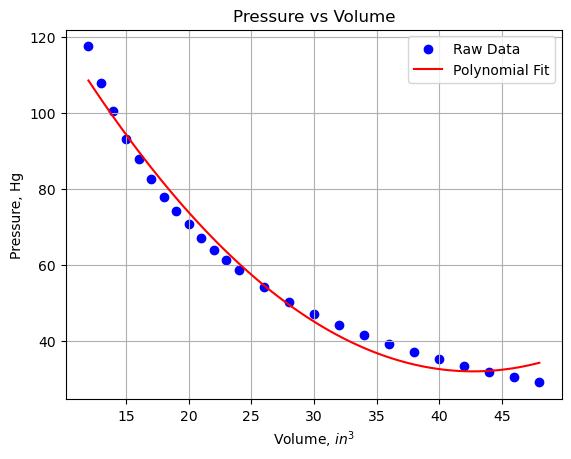

In [32]:
# Task B: Data Visualization

# Visualize the relationship between volume vs pressure
import matplotlib.pyplot as plt                                      # Imports the matplotlib library

volume = df['Volume']                                                # Creates dataframe for volume data
pressure = df['Pressure']                                            # Creates dataframe for pressure data
plt.scatter(volume, pressure, color = "blue", label = 'Raw Data')    # Creates a scatterplot of raw data (blue)

plt.xlabel('Volume, $in^3$')                                         # Creates y-axis label with units
plt.ylabel('Pressure, Hg')                                           # Creates y-axis label with units
plt.title('Pressure vs Volume')                                      # Creates a plot title

plt.grid(True)                                                       # Creates gridlines

# Task C: Curve Fitting and Modeling

!pip install numpy                                                   # Installs the NumPy library     
import numpy as np

coefficients = np.polyfit(volume, pressure, 2)                       # 2 designates a degree 2 polynomial (quadratic)
def polynomial(x):                                                   # Defines quadratic fit relationship
    return coefficients[0] * x ** 2 + coefficients[1] * x + coefficients[2]

volume_line = np.linspace(min(volume), max(volume), 100)
pressure_line = polynomial(volume_line)                              # Creates quadratic fit of data

plt.plot(volume_line, pressure_line, color = 'red',                  # Plots curve fit line (red) 
         label = 'Polynomial Fit')

plt.legend()                                                         # Creates legend

plt.show()                                                           # Prints plot

polynomial fit equation: 0.081x² + -6.933x + 180.078


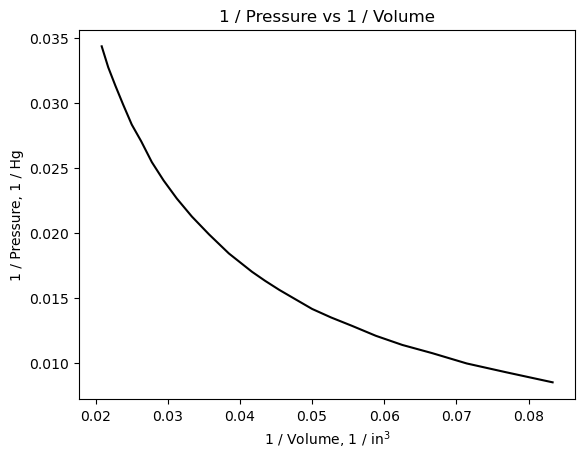

The data do not make physical sense, as for an ideal gas, the change in pressure and volume are inversely related when held at a constant temperature. As a result, a roughly linear relationship is expected when plotting 1/V vs 1/P, which is not shown by the data.


In [33]:
# Task D: Deriving a Mathematical Model

# Coefficients were rounded to 3 decimal places to make equation easier to read
print(f"polynomial fit equation: {coefficients[0]:.3f}x² + {coefficients[1]:.3f}x + {coefficients[2]:.3f}")

# If the data support Boyle's law, plotting 1/V vs 1/P should result in a linear relationship
inverse_volume = 1.0 / volume
inverse_pressure = 1.0 / pressure

plt.plot(inverse_volume, inverse_pressure, color = 'black')      # Plots 1/V vs 1/P line (black)

plt.xlabel('1 / Volume, 1 / in$^3$')
plt.ylabel('1 / Pressure, 1 / Hg')
plt.title('1 / Pressure vs 1 / Volume')

plt.show()                                                       # Prints plot with non-linear relationship 
print("The data do not make physical sense, as for an ideal gas, the change in pressure and volume are inversely related when held at a constant temperature. As a result, a roughly linear relationship is expected when plotting 1/V vs 1/P, which is not shown by the data.")

In [34]:
# Task E: Error Analysis

residuals = pressure - polynomial(volume)              # Formula for residuals of each data point
rmse = np.sqrt(np.mean(residuals**2))                  # Formula for the Root Mean Square Error

print(f"RMSE: {rmse:.3f}")                             # Prints RMSE (rounded to 3 decimal places to make equation easier to read)

# Discussion of polynomial fit
print(f"The moderately high, positive RMSE value of {rmse:.3f} indicates a moderate polynomial fit to the data. In particular, high residuals can be found at low volume, high pressure data points and high volume, low pressure data points.")

RMSE: 3.262
The moderately high, positive RMSE value of 3.262 indicates a moderate polynomial fit to the data. In particular, high residuals can be found at low volume, high pressure data points and high volume, low pressure data points.
